In [ ]:
# PCA implementation using NumPy
import numpy as np 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [76]:
class PCA_NumPy:
    def __init__(self, n_components, scaler = None):
        self.n_components = n_components
        self.mean = None
        self.pca = None
        self.explained_variance = None
        self.standardizer = scaler
    
    def fit(self,X):
        n = X.shape[0]
        if self.standardizer is not None:
            X = self.standardizer.fit_transform(X)
        # mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        # covariance matrix
        cov = (X_centered.T @ X_centered)/(n - 1)    
        # eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        
        # sort eigenvalues and eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:,idxs]
        self.explained_variance = eigenvalues[:self.n_components]
        self.pca = eigenvectors[:, :self.n_components]
        X_reduced = X_centered @ self.pca
        return X_reduced
    
        
        

### Comparing stratch PCA with sklearn PCA on Iris Dataset

In [77]:
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
pca_scratch = PCA_NumPy(n_components=2,scaler=scaler)
X_reduced_scratch = pca_scratch.fit(X)
pca_sklearn = PCA(n_components=2)
X_std = scaler.fit_transform(X)
X_reduced_sklearn = pca_sklearn.fit_transform(X_std)


In [78]:
print("Explained variance by scratch PCA:", pca_scratch.explained_variance)
print("pca:")
pca_scratch.pca

Explained variance by scratch PCA: [2.93808505 0.9201649 ]
pca:


array([[-0.52106591,  0.37741762],
       [ 0.26934744,  0.92329566],
       [-0.5804131 ,  0.02449161],
       [-0.56485654,  0.06694199]])

 <b> Ploting the results of both implementations to visualize the differences

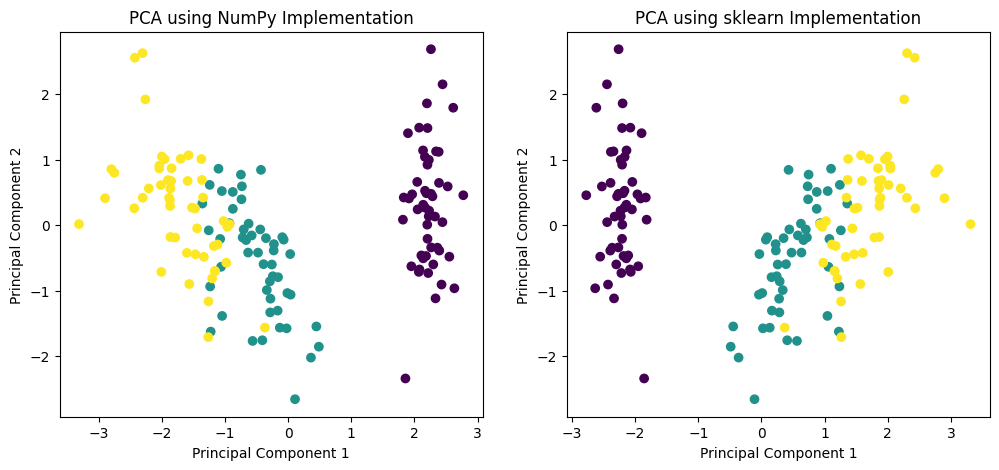

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_reduced_scratch[:, 0], X_reduced_scratch[:, 1], c=y)
plt.title('PCA using NumPy Implementation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], c=y)
plt.title('PCA using sklearn Implementation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



<b> TSNE implementation using sklearn

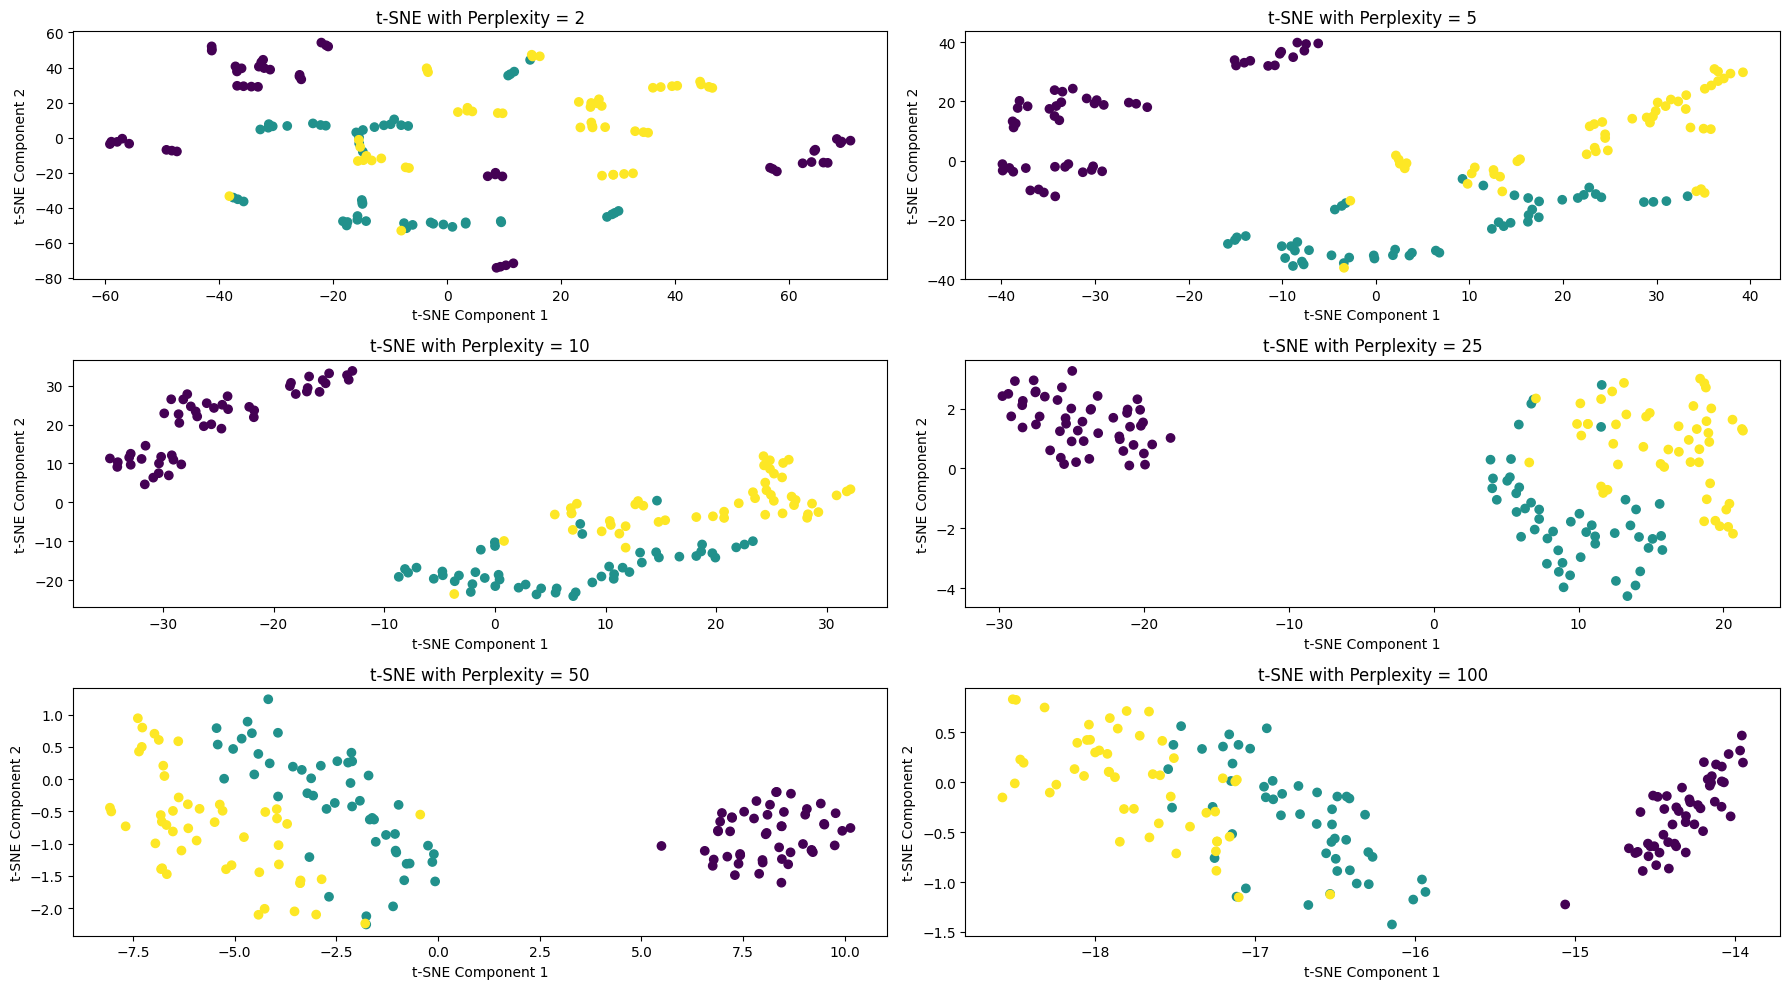

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
perplexities = [2,5,10,25,50,100]
plt.figure(figsize=(18,10))
for i,perplexity in enumerate(perplexities):
    tsne = TSNE(n_components = 2, perplexity=perplexity, init= 'pca',random_state= 42)
    X_reduced = tsne.fit_transform(X_std)
    plt.subplot(3, 2, i + 1)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
    plt.title(f't-SNE with Perplexity = {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
plt.tight_layout()
plt.show()
    
